<a href="https://colab.research.google.com/github/Karlosicolombia/Synthethic-Training-Data-for-Sponswatch-AB/blob/main/maskingTheo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [347]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [348]:
from google.colab import drive
drive.mount('/content/drive')

directory ='/content/drive/MyDrive/adidas'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [349]:
from google.colab.patches import cv2_imshow

img = cv2.imread(r'/content/drive/MyDrive/adidas/masktestadidas.png')
#cv2_imshow(img)

In [350]:
kernel = np.ones((5, 5), np.uint8)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [351]:
Lower_hsv = np.array([20, 50, 100])
Upper_hsv = np.array([255, 255, 255])

In [352]:
# creating the mask by eroding,morphing,
# dilating process
Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)
Mask = cv2.erode(Mask, kernel, iterations=1)
Mask = cv2.morphologyEx(Mask, cv2.MORPH_OPEN, kernel)
Mask = cv2.dilate(Mask, kernel, iterations=1)

In [353]:
Mask = cv2.bitwise_not(Mask) #svart
mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv) #vit
result = cv2.bitwise_and(img,img, mask = Mask)


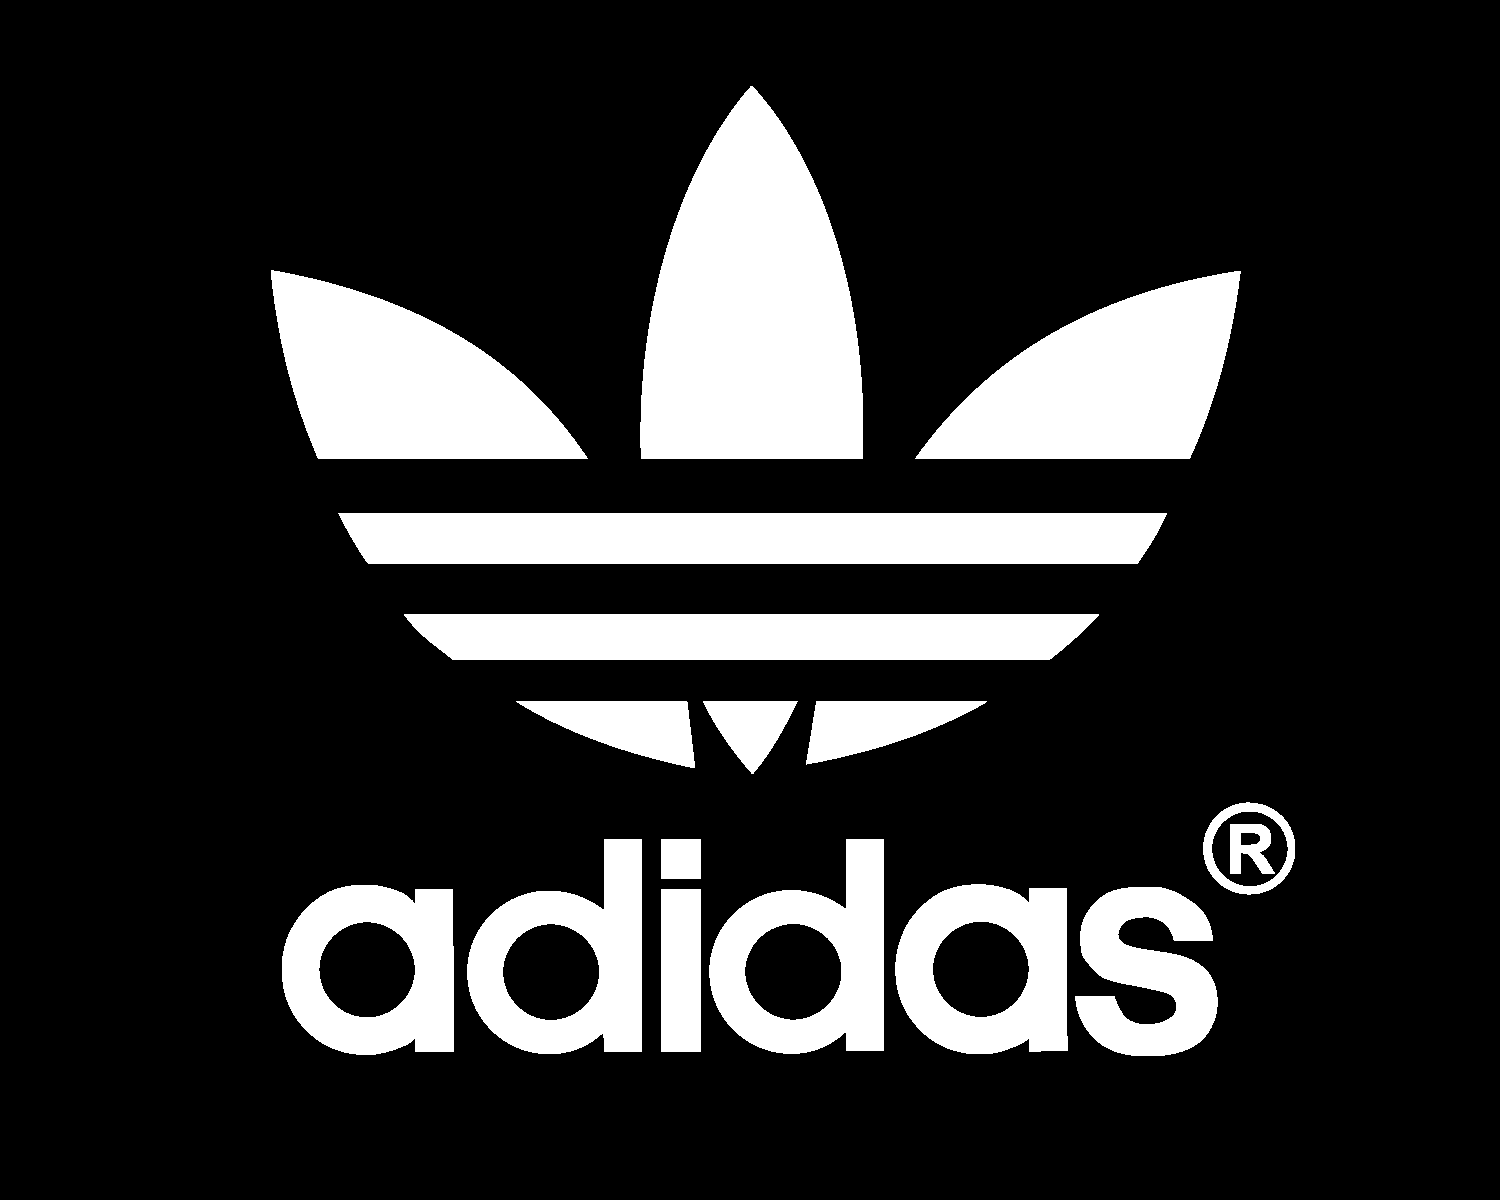

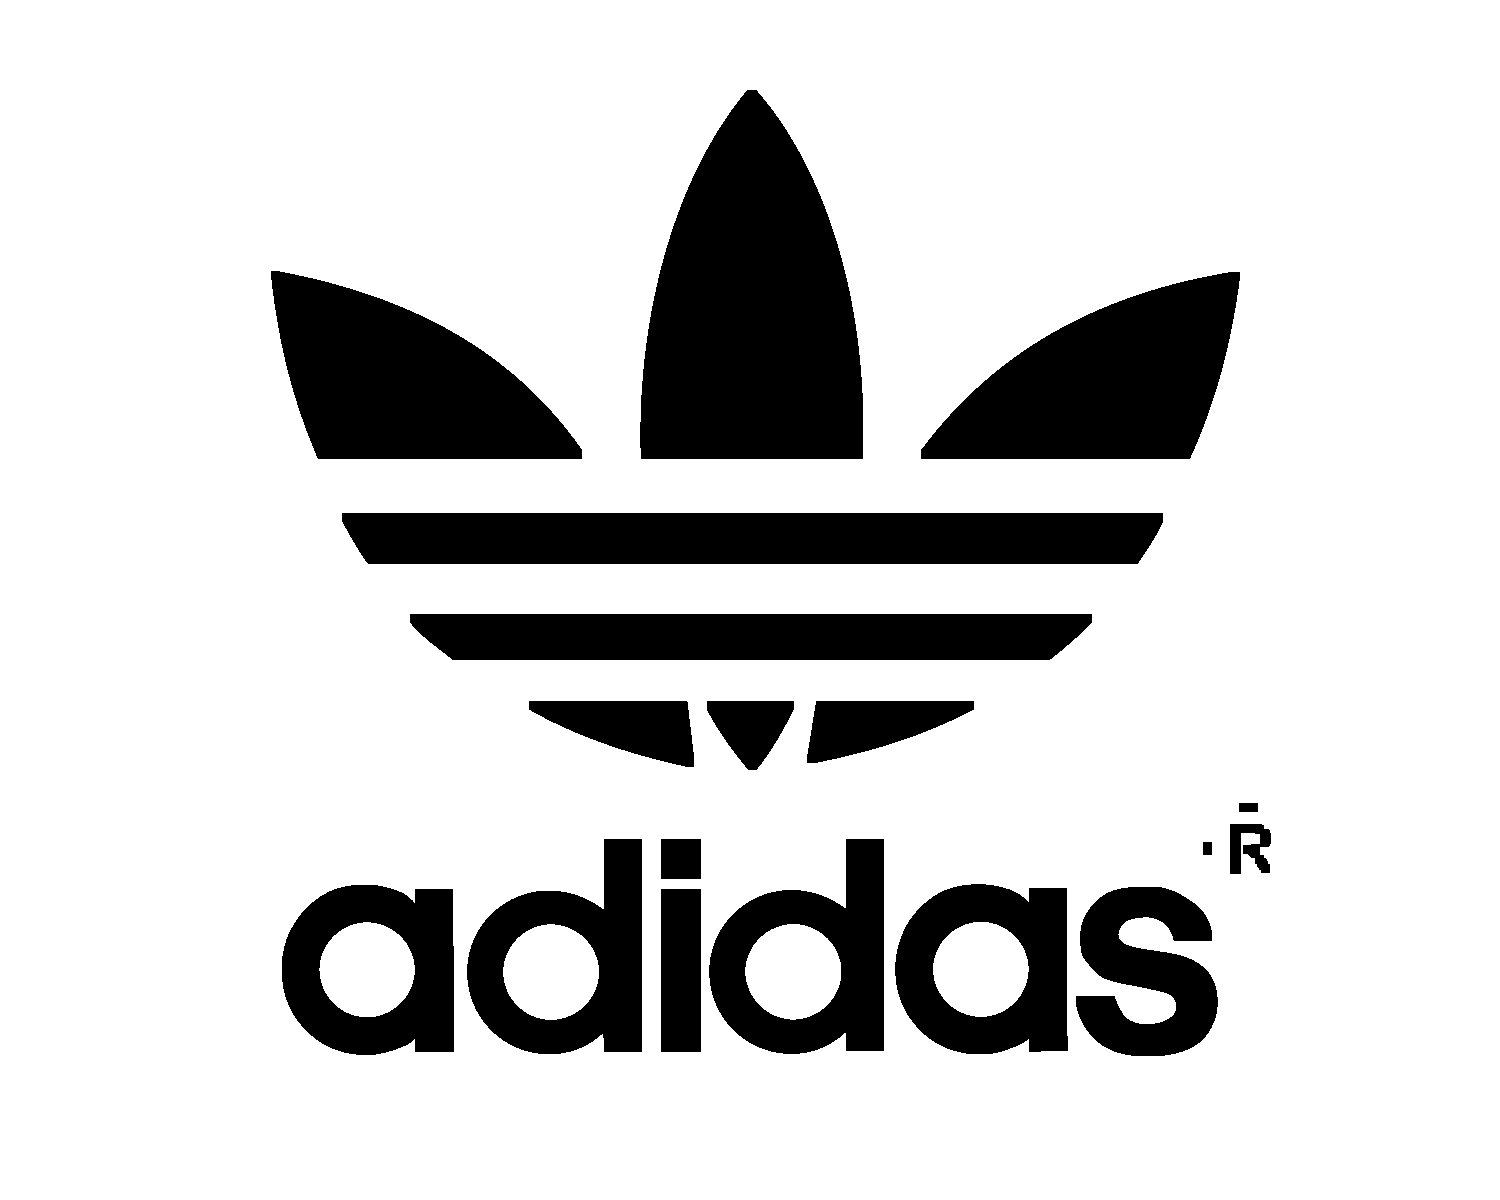

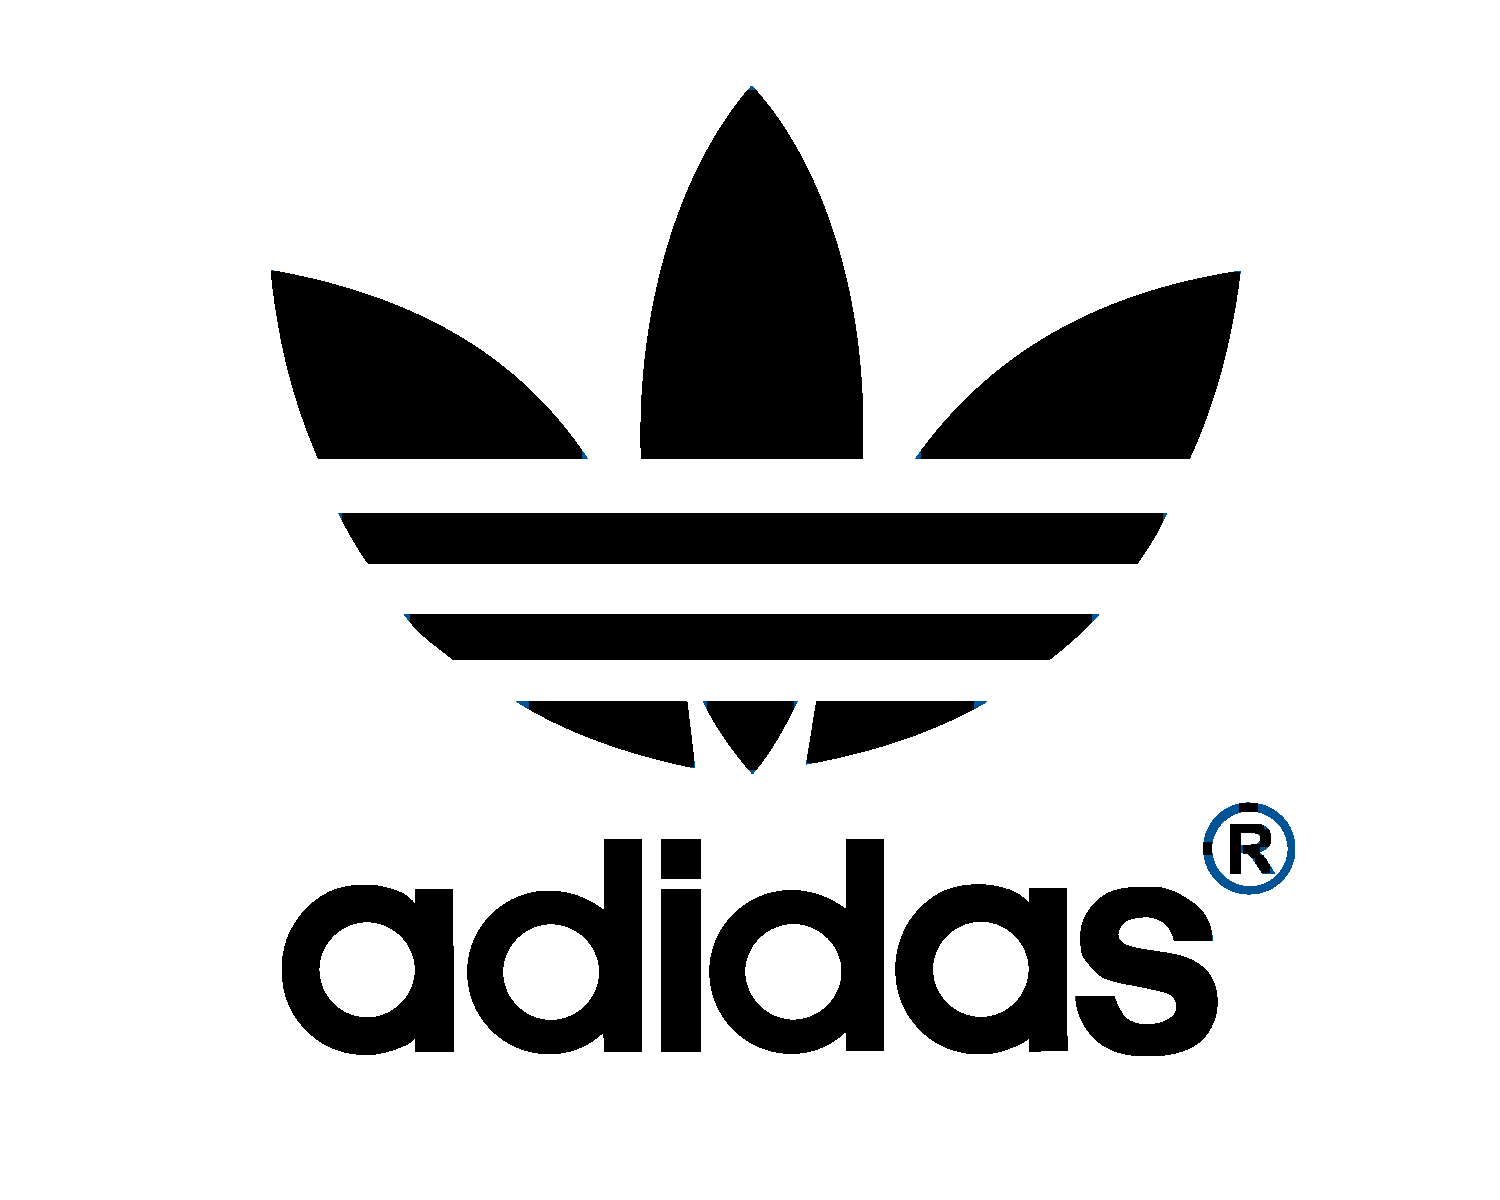

In [354]:
# Displaying the image
cv2_imshow(mask)
cv2_imshow(Mask)
cv2_imshow(result)

In [355]:
# waits for user to press any key
# (this is necessary to avoid Python 
# kernel form crashing)
cv2.waitKey(0)

-1

In [356]:
# closing all open windows
cv2.destroyAllWindows()